# OCR
 

## Imports

In [30]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import re
from os.path import exists
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import string


import letter_detection_utils as ld_util
import preprocessing as pp
import ressources as rss
import modele as mdl
import rendering as rd
import metric_orthograph as mo
import matplotlib.pyplot as plt


# initialisation des variables globales
rss.init()



In [28]:
# Pour recharger les libs pendant les devs
from importlib import reload 
reload(ld_util)
reload(pp)
reload(rss)
reload(mdl)
reload(rd)
reload(mo)

<module 'metric_orthograph' from 'd:\\GitHub\\OCRpyMAN\\notebooks\\metric_orthograph.py'>

# Full model

In [2]:
# Loads models

text_detection_model = mdl.load_text_detection_model("text_detection/fine_tuning_final/weights")
text_reco_model = tf.keras.models.load_model("../pickle/tj_ctc_augmented_20epochs_LR-plateau", custom_objects={"CTCLoss": mdl.CTCLoss})


INFO:root:Using downloaded & verified file: C:\Users\TiBo\.cache\doctr\models\db_resnet50-adcafc63.zip
2023-03-01 11:18:39.998 INFO    root: Using downloaded & verified file: C:\Users\TiBo\.cache\doctr\models\db_resnet50-adcafc63.zip
INFO:root:Using downloaded & verified file: C:\Users\TiBo\.cache\doctr\models\crnn_vgg16_bn-76b7f2c6.zip
2023-03-01 11:18:44.235 INFO    root: Using downloaded & verified file: C:\Users\TiBo\.cache\doctr\models\crnn_vgg16_bn-76b7f2c6.zip


C:\Users\TiBo\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3/3 [==============================] - 1s 243ms/step


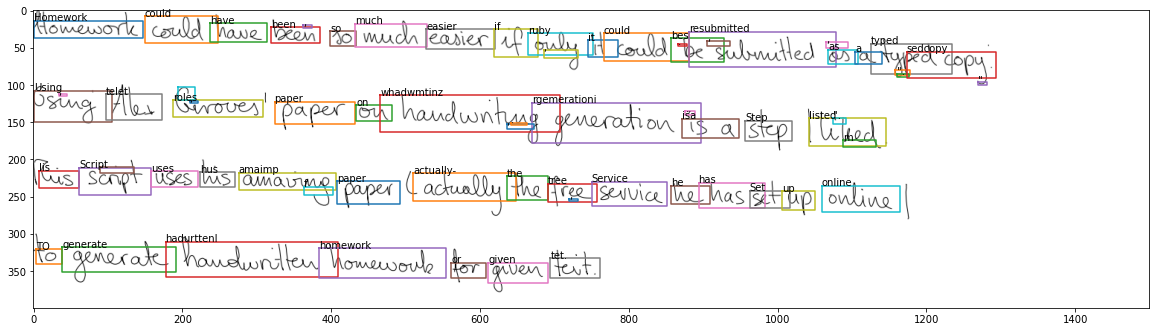

['Homework', 'could', 'have', 'been', ',', 'so', 'much', 'easier', 'if', 'ruby', 'it', 'could', 'bes', '.', 'resubmitted', ',', ',', 'typed', ',', 'as', 'a', '', '".', 'sedcopy', '"', 'Using', ',', 'telet', 'roles', '', ',', 'paper', 'on', 'whadwmtinz', 'rgemerationi', 'isa', '..', 'Step', 'listed', '".', ',', '.', 'm', 'lis', 'Script', ',', 'uses', 'hus', 'amaimp', 'f', 'paper', 'actually-', 'the', 'tree', 'Service', 'he', 'has', 'Set', 'up', 'online', ',', 'TO', 'generate', 'hadurttenl', 'homework', 'or', 'given', 'tet.']


In [31]:
# Uses both models, chained

form_img_path = '../images/other_handwritten_text.png'
text = mdl.make_ocr(text_detection_model, text_reco_model, form_img_path, with_display=True)
print(text)

4/4 [==============================] - 1s 254ms/step


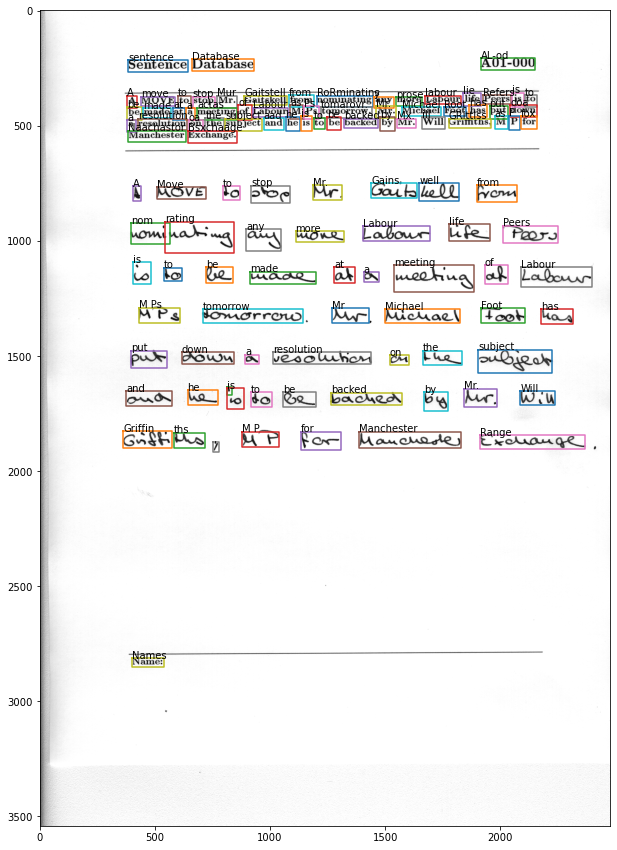

['sentence', 'Database', 'AL-od', 'A', 'move', 'to', 'stop', 'Mur', 'Gaitstell', 'from', 'RoRminatins', 'y', 'prose', 'labour', 'lie', 'Refers', 'is', 'to', 'be', 'made', 'at', 'a', 'actas', 'of', 'Labour', 'as', 'Ps', 'tomarovr.', 'Mr.', 'Michael', 'Root', 'has', 'put', 'doa', 'a', 'resolution', 'oa', 'the', 'subject', 'aad', 'he', 'is', 'to', 'be', 'backed', 'by', 'Mx.', 'ill', 'GRittlss', 'as', 'P', 'fox', 'Naachastor', 'Bsxchaage', 'A', 'Move', 'to', 'stop', 'Mr.', 'Gains', 'well', 'from', 'nom', 'rating', 'Labour', 'life', 'Peers', 'any', 'more', 'is', 'to', 'be', 'made', 'at', 'a', 'meeting', 'of', 'Labour', 'M Ps', 'tomorrow', 'Mr', 'Michael', 'Foot', 'has', 'put', 'down', 'a', 'resolution', 'on', 'the', 'subject', 'he', '.', 'is', 'Mr.', 'and', 'to', 'be', 'backed', 'by', 'Will', 'Griffin', 'ths', 'M P', 'for', 'Manchester', 'Range', ',', 'Names']


In [16]:
form_img_path = '../data/formsA-D/a01-000u.png'
text = mdl.make_ocr(text_detection_model, text_reco_model, form_img_path, with_display=True)
print(text)

3/3 [==============================] - 1s 266ms/step


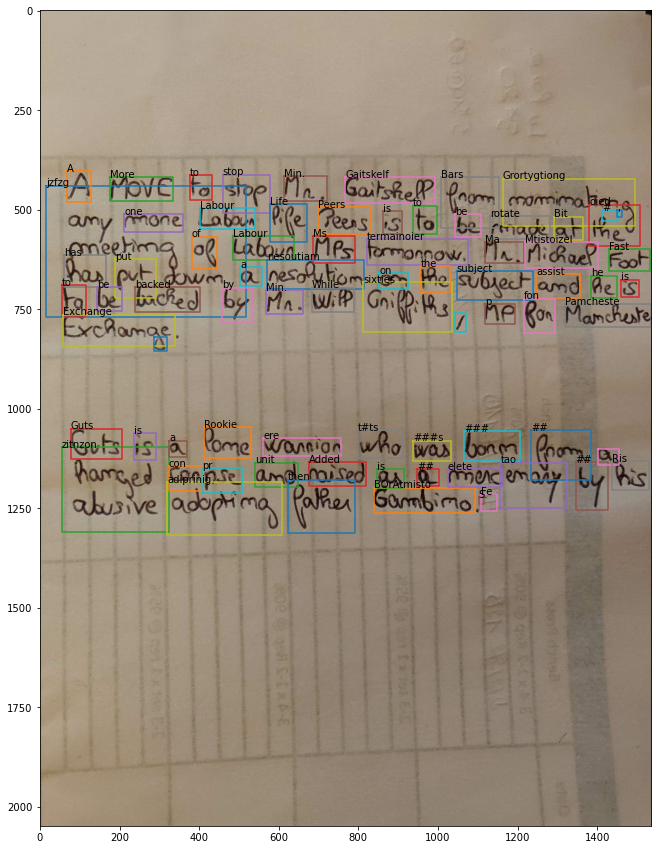

['jzfzg', 'A', 'More', 'to', 'stop', 'Min.', 'Gaitskelf', 'Bars', 'Grortygtiong', 'Labour', 'Life', 'Peers', 'to', 'died', 'one', 'is', 'be', 'rotate', 'Bit', '#', ',', 'of', 'Labour', 'Ms', 'termainoier', 'Ma', 'Mtistoizel', 'has', 'put', 'a', 'nesoutiam', 'the', 'Fast', 'to', 'be', 'backed', 'by', 'While', 'sixties', 'on', 'subject', 'assist', 'he', 'is', 'Min.', 'p', 'fon', 'Pamcheste', 'Exchange', '', '', 'Rookie', 'zitnzon', 'Guts', 'is', 'a', 'ere', 't#ts', '###s', '###', '##', 'con', 'unit', 'Added', 'tao', '##', '', 'Ris', 'adiprinig', 'pr', 'then', 'BOrAtmisto', 'is', '##', 'elete', 'S.', 'Fe']


In [26]:
text = mdl.make_ocr(
    text_detection_model, 
    text_reco_model, 
    'text_detection/custom_imgs/custom_writing.jpeg',
    with_display=True)

print(text)